# I] Import and options


In [34]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [18]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [19]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp1_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 26.9 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
26,52.0,86.82537,94.97466,98.28023,96.87165,91.70433,96.42653,69.76159,62.73172,77.88731,...,3.091698,3.308378,2.522672,3.027512,2.855083,2.157001,3.642731,2.490677,2.294660,1.953691
27,54.0,91.09386,92.59055,95.63158,92.18909,83.09866,96.64404,74.52564,71.13065,83.69419,...,4.319202,2.749834,3.140880,3.444478,2.760447,2.854899,3.951364,3.387626,2.997449,2.887991
28,56.0,94.62511,94.85287,98.22715,97.70577,92.93327,98.32720,80.08359,83.17780,92.49662,...,6.036583,2.253902,3.614776,3.440794,2.758153,3.101831,4.040591,4.357156,3.960287,3.412214
29,58.0,96.35883,96.68823,98.52901,97.82701,94.64336,97.99445,78.96611,84.68988,91.86390,...,6.222861,2.711493,2.296404,2.998320,2.866705,1.957413,4.385201,4.414485,3.758769,3.228660
30,60.0,95.47753,97.60972,98.94588,97.17578,92.79214,97.79563,69.09030,70.62864,84.43202,...,3.224854,2.597328,1.912236,2.211504,2.475111,2.604975,4.567994,3.488782,2.819020,2.183641


In [20]:
#I have 6 cell lines per condition and 4 conditions
#List of Columns
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

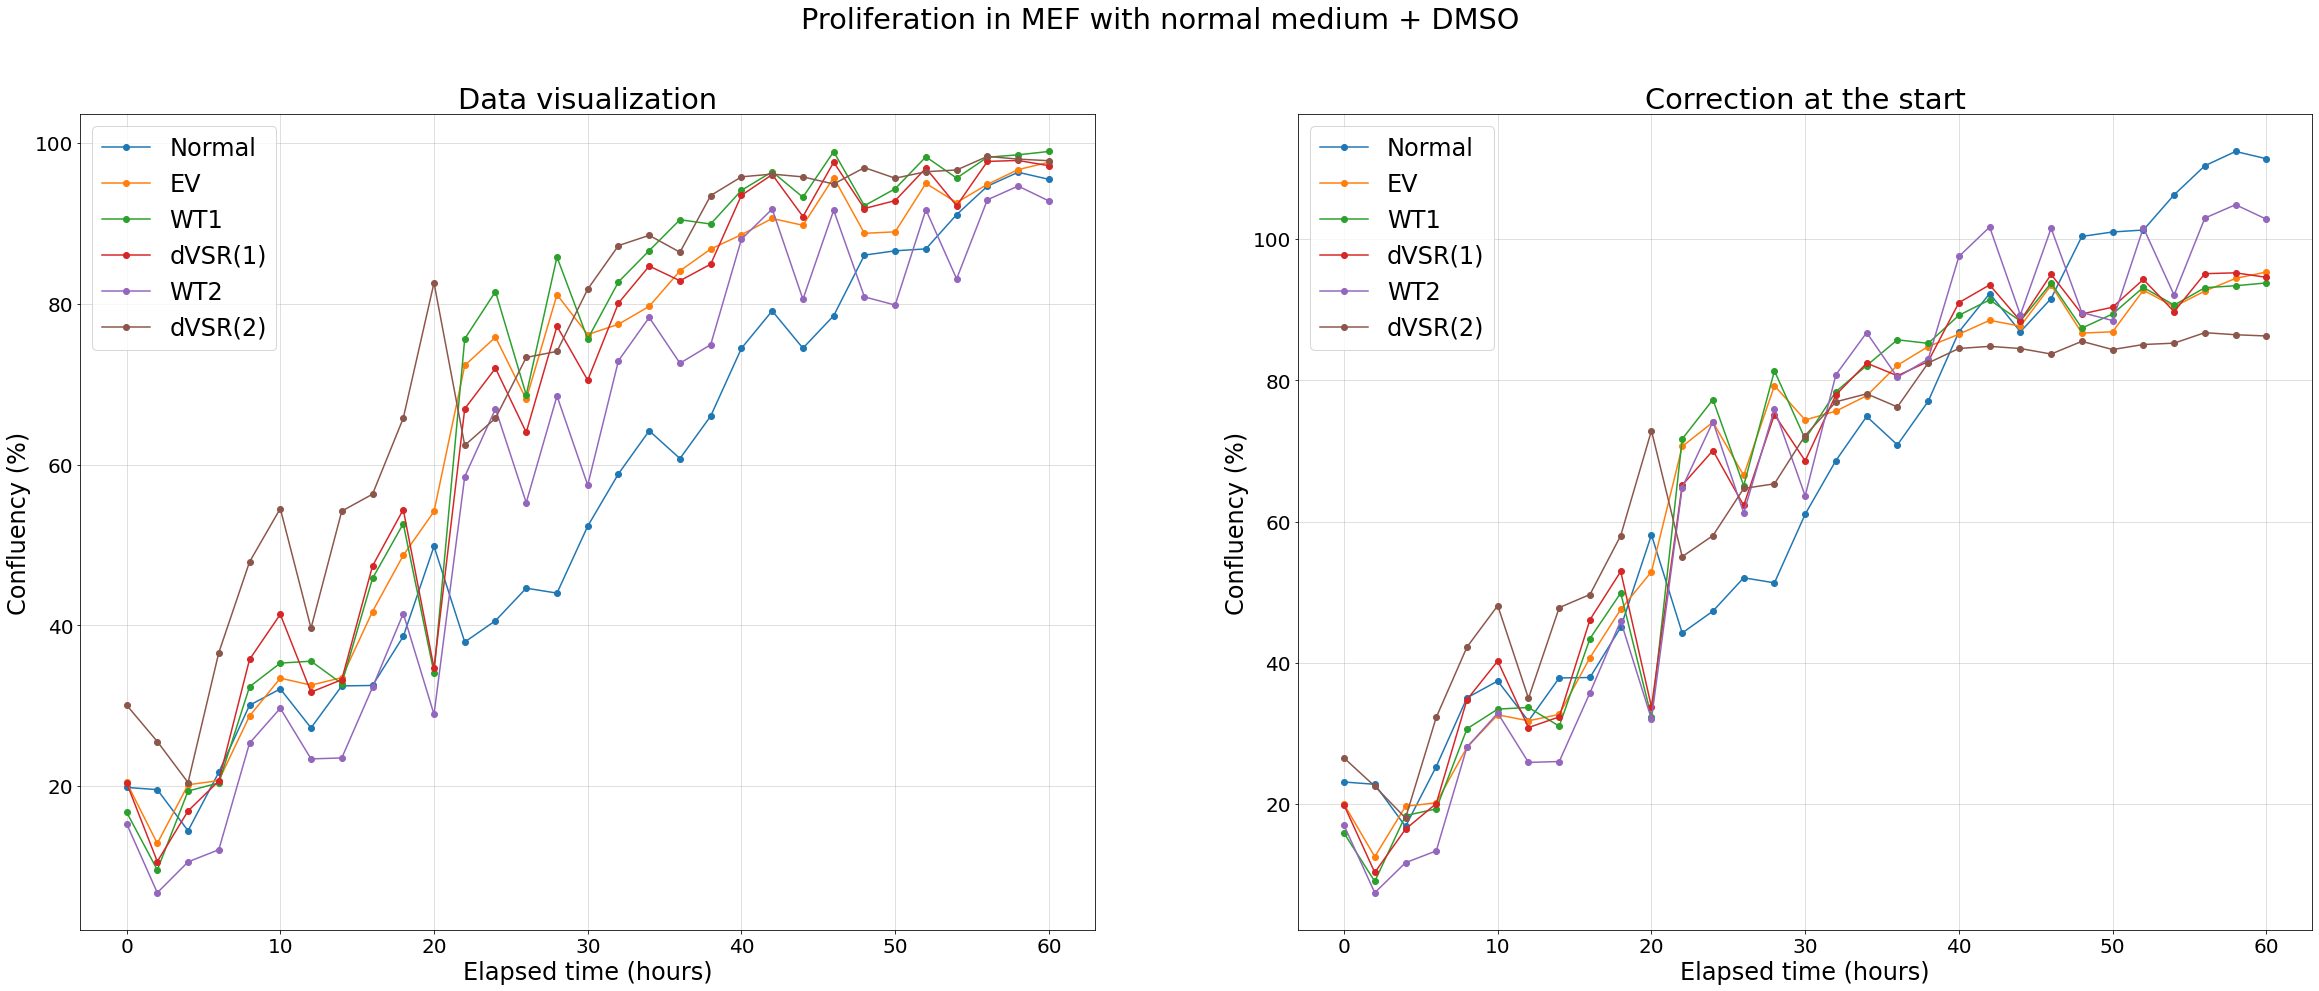

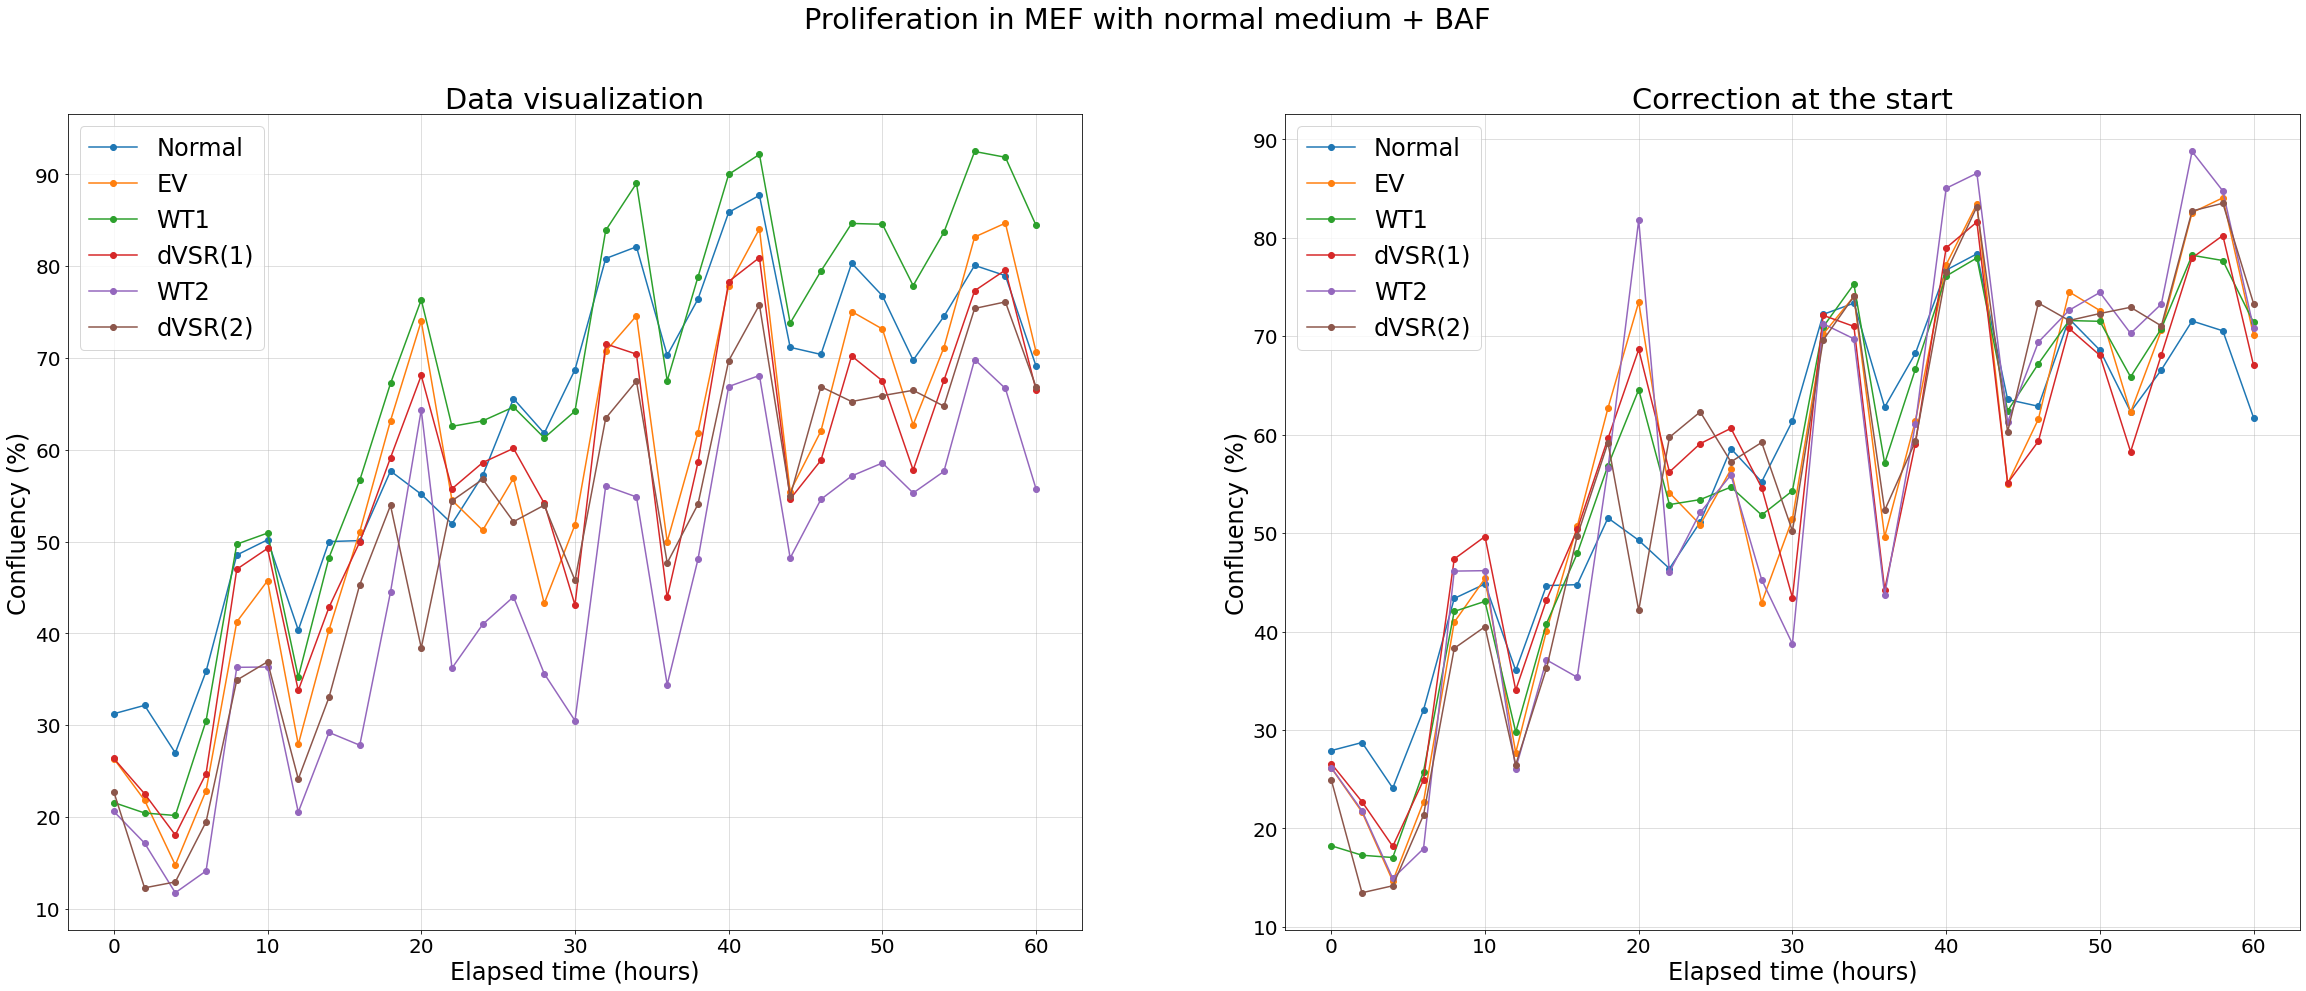

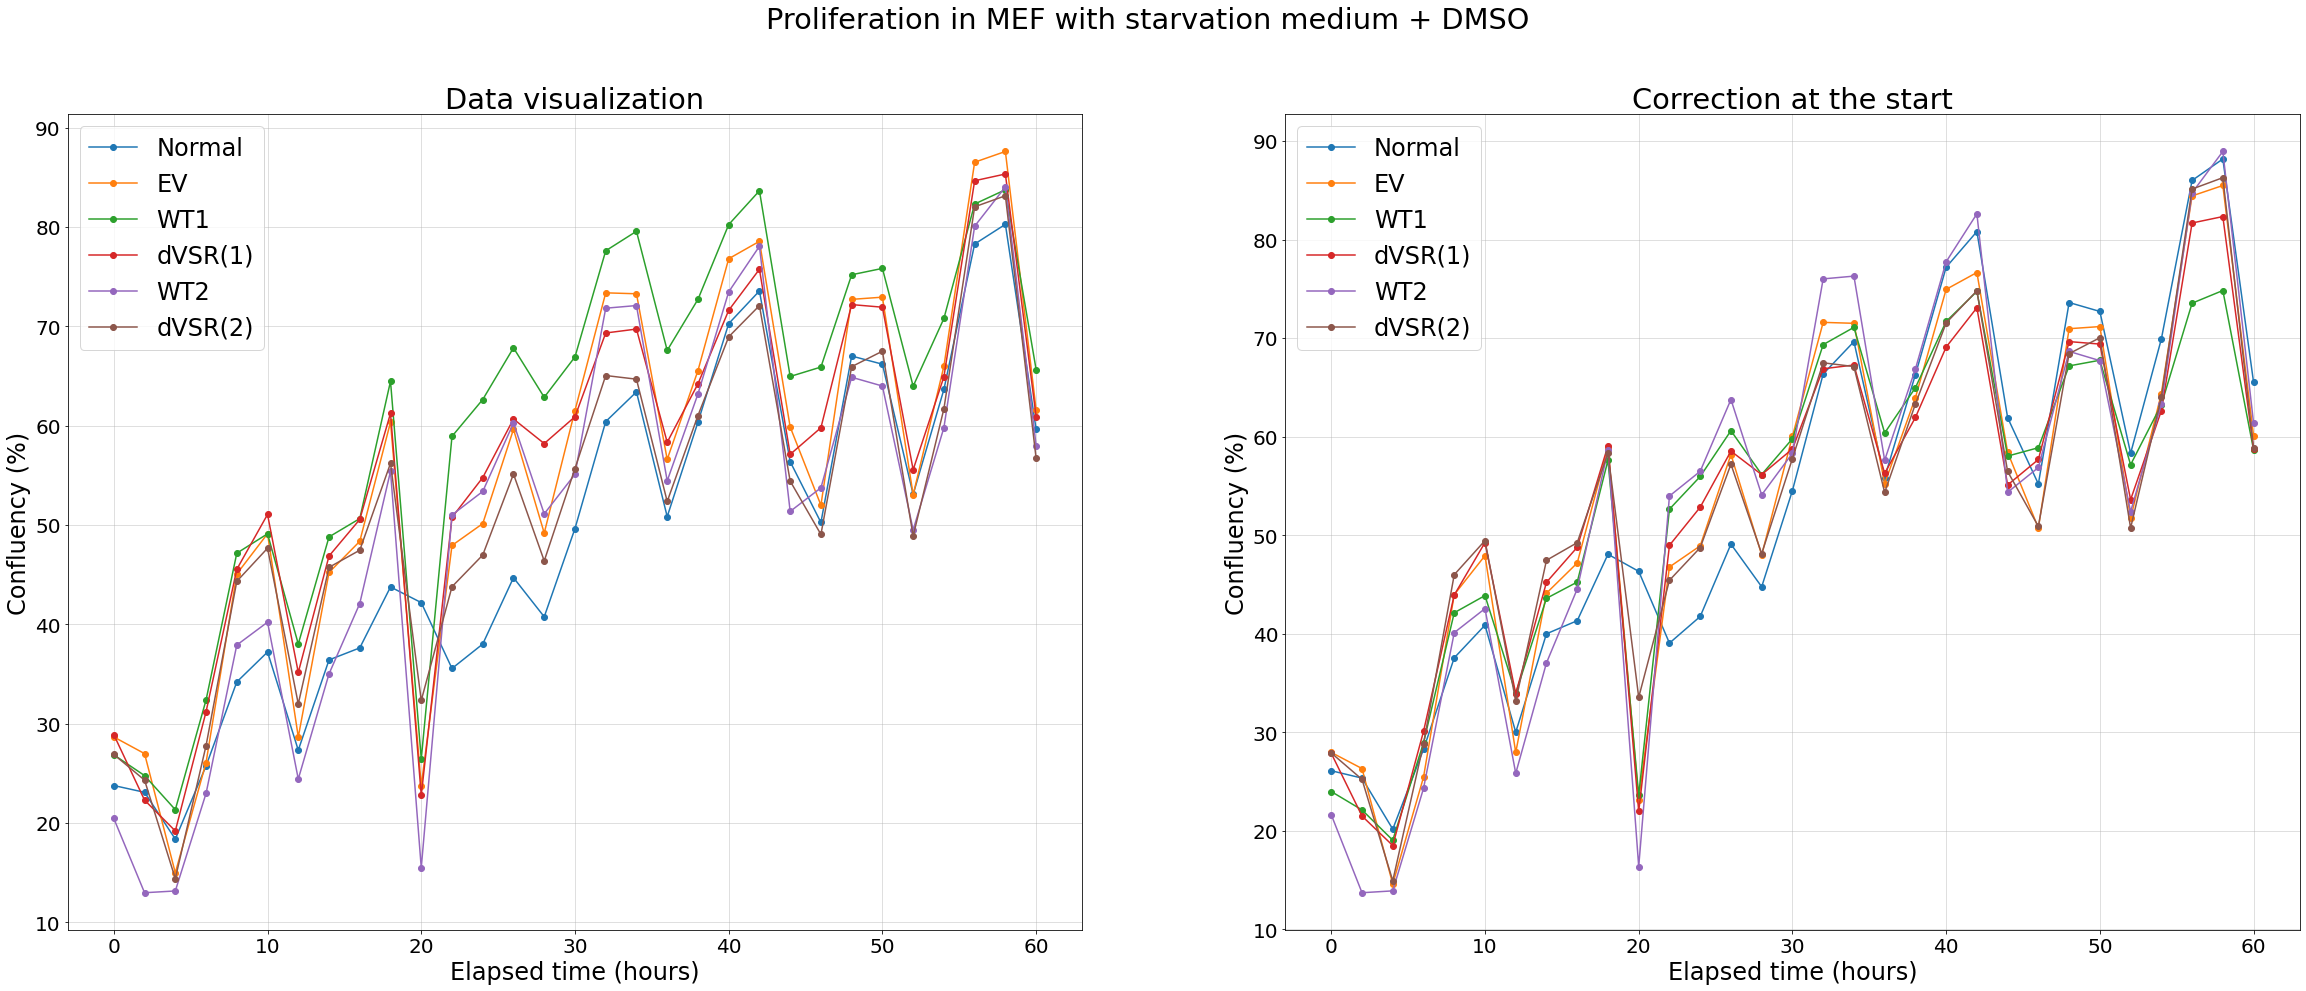

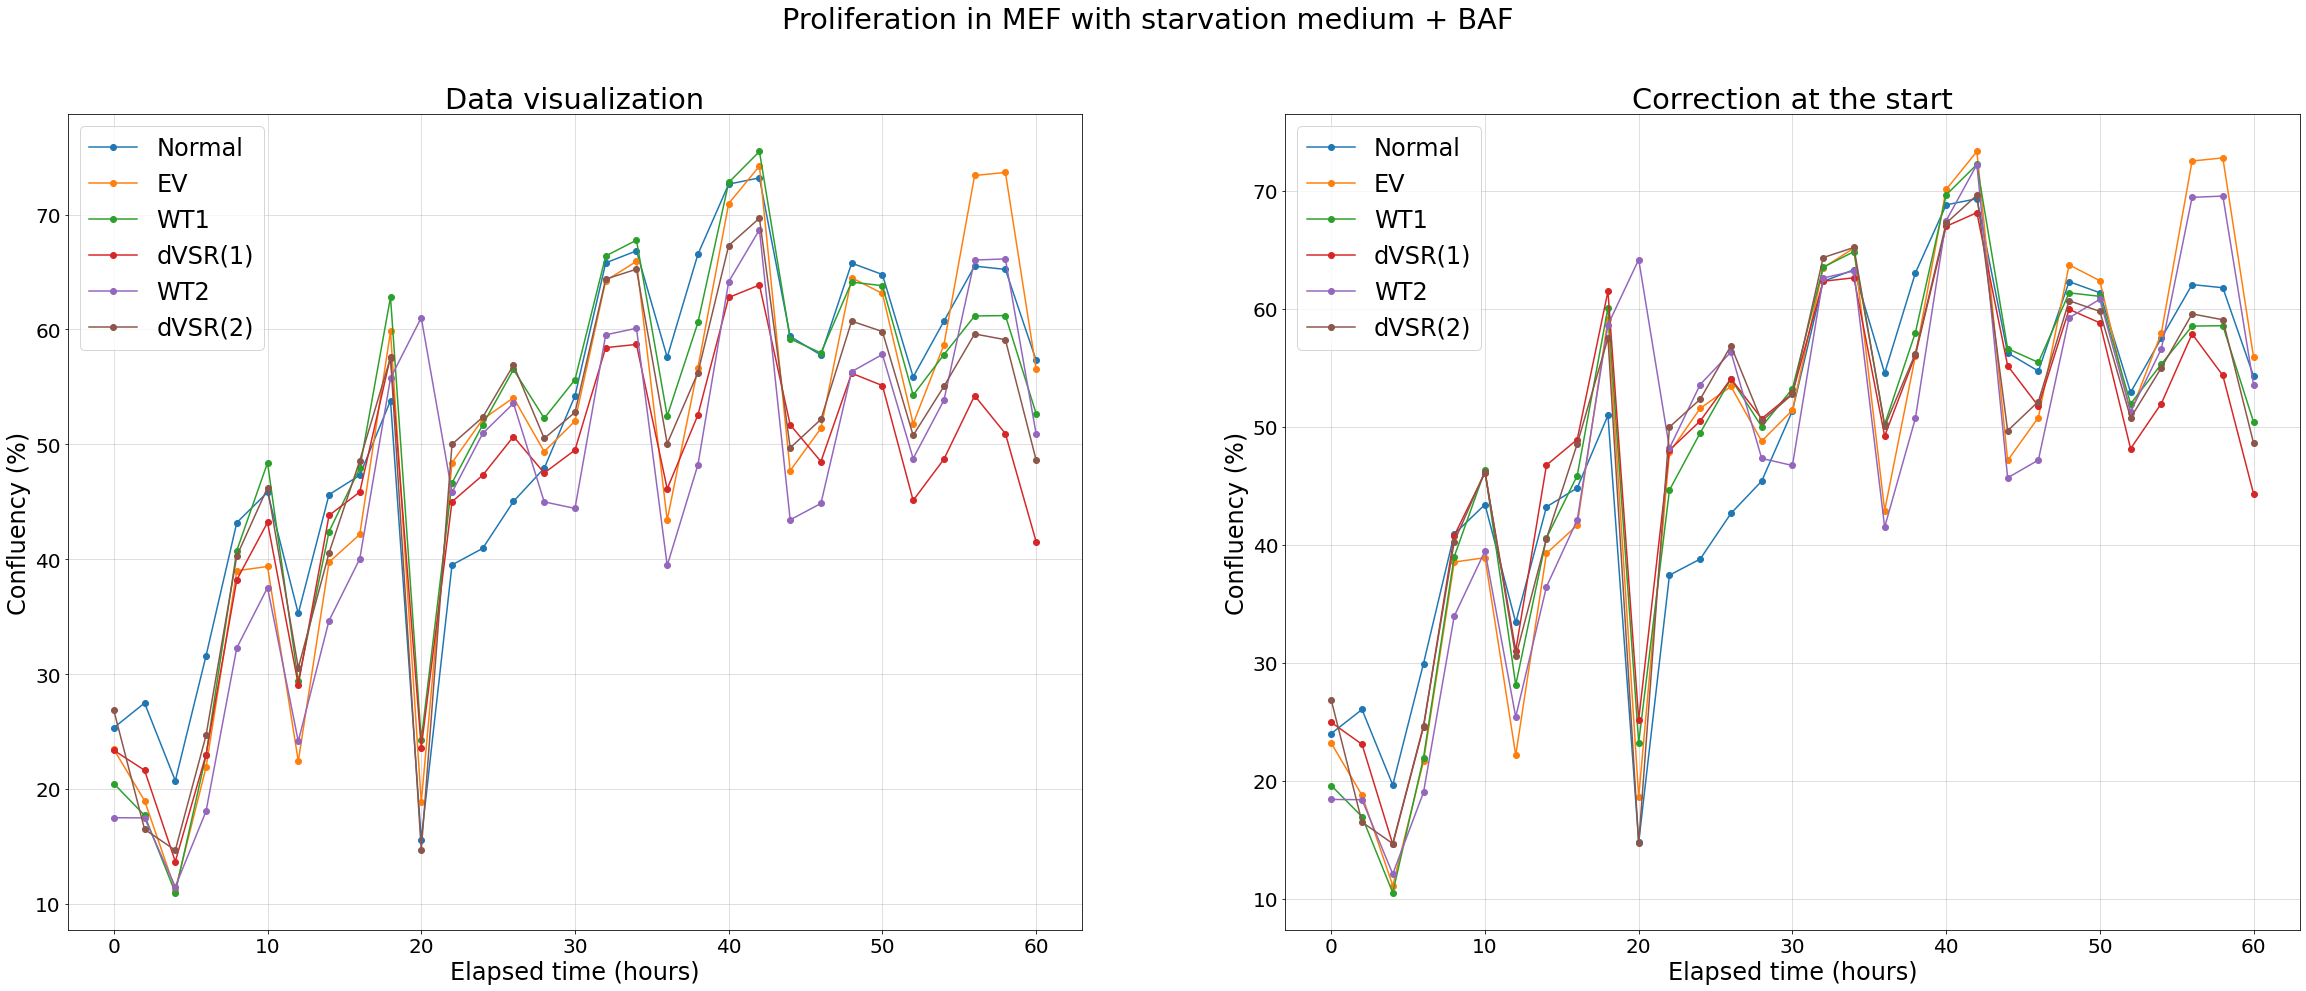

In [11]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data

        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
        
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp1/graph_exp1_'    
#         fig.savefig(path+drug+'.svg')
        print()

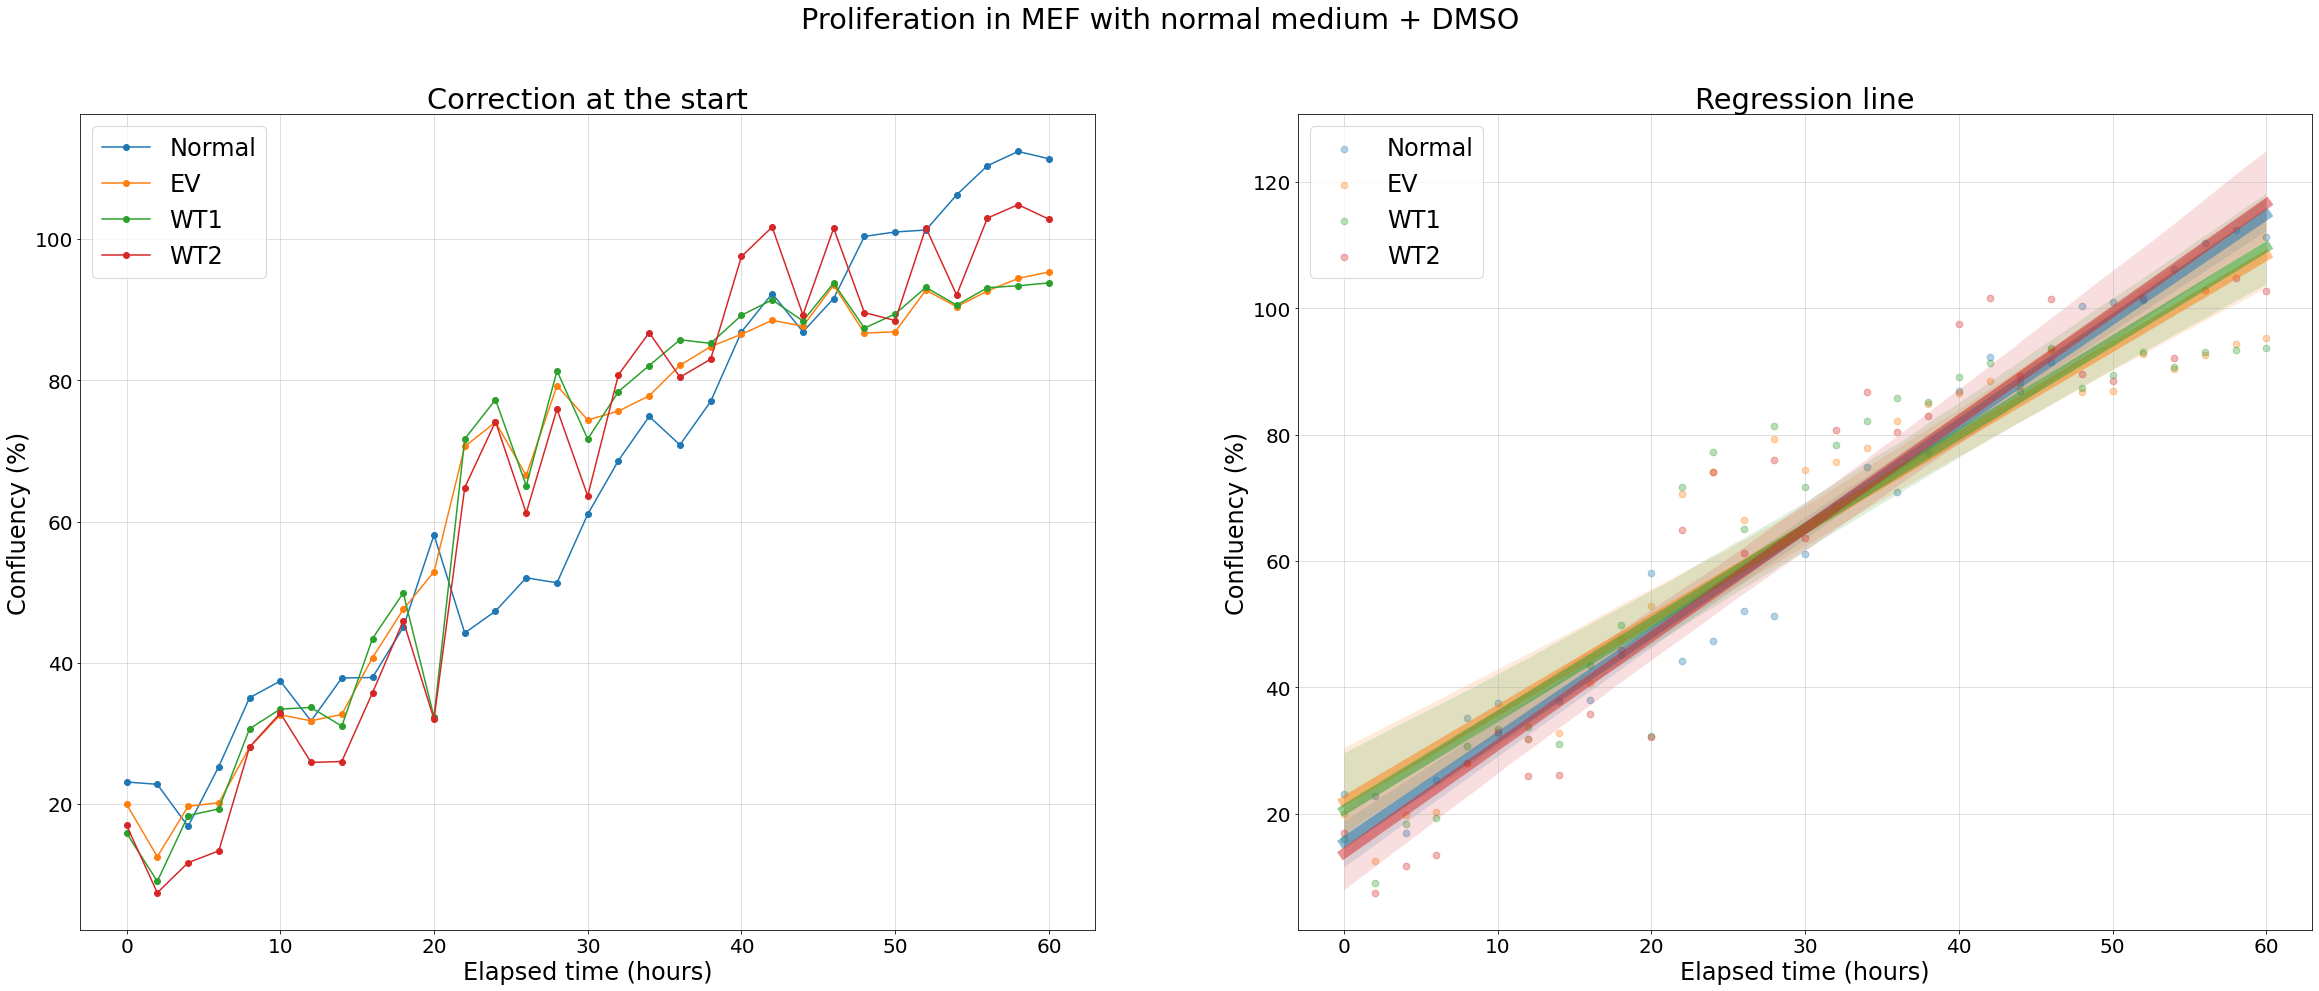

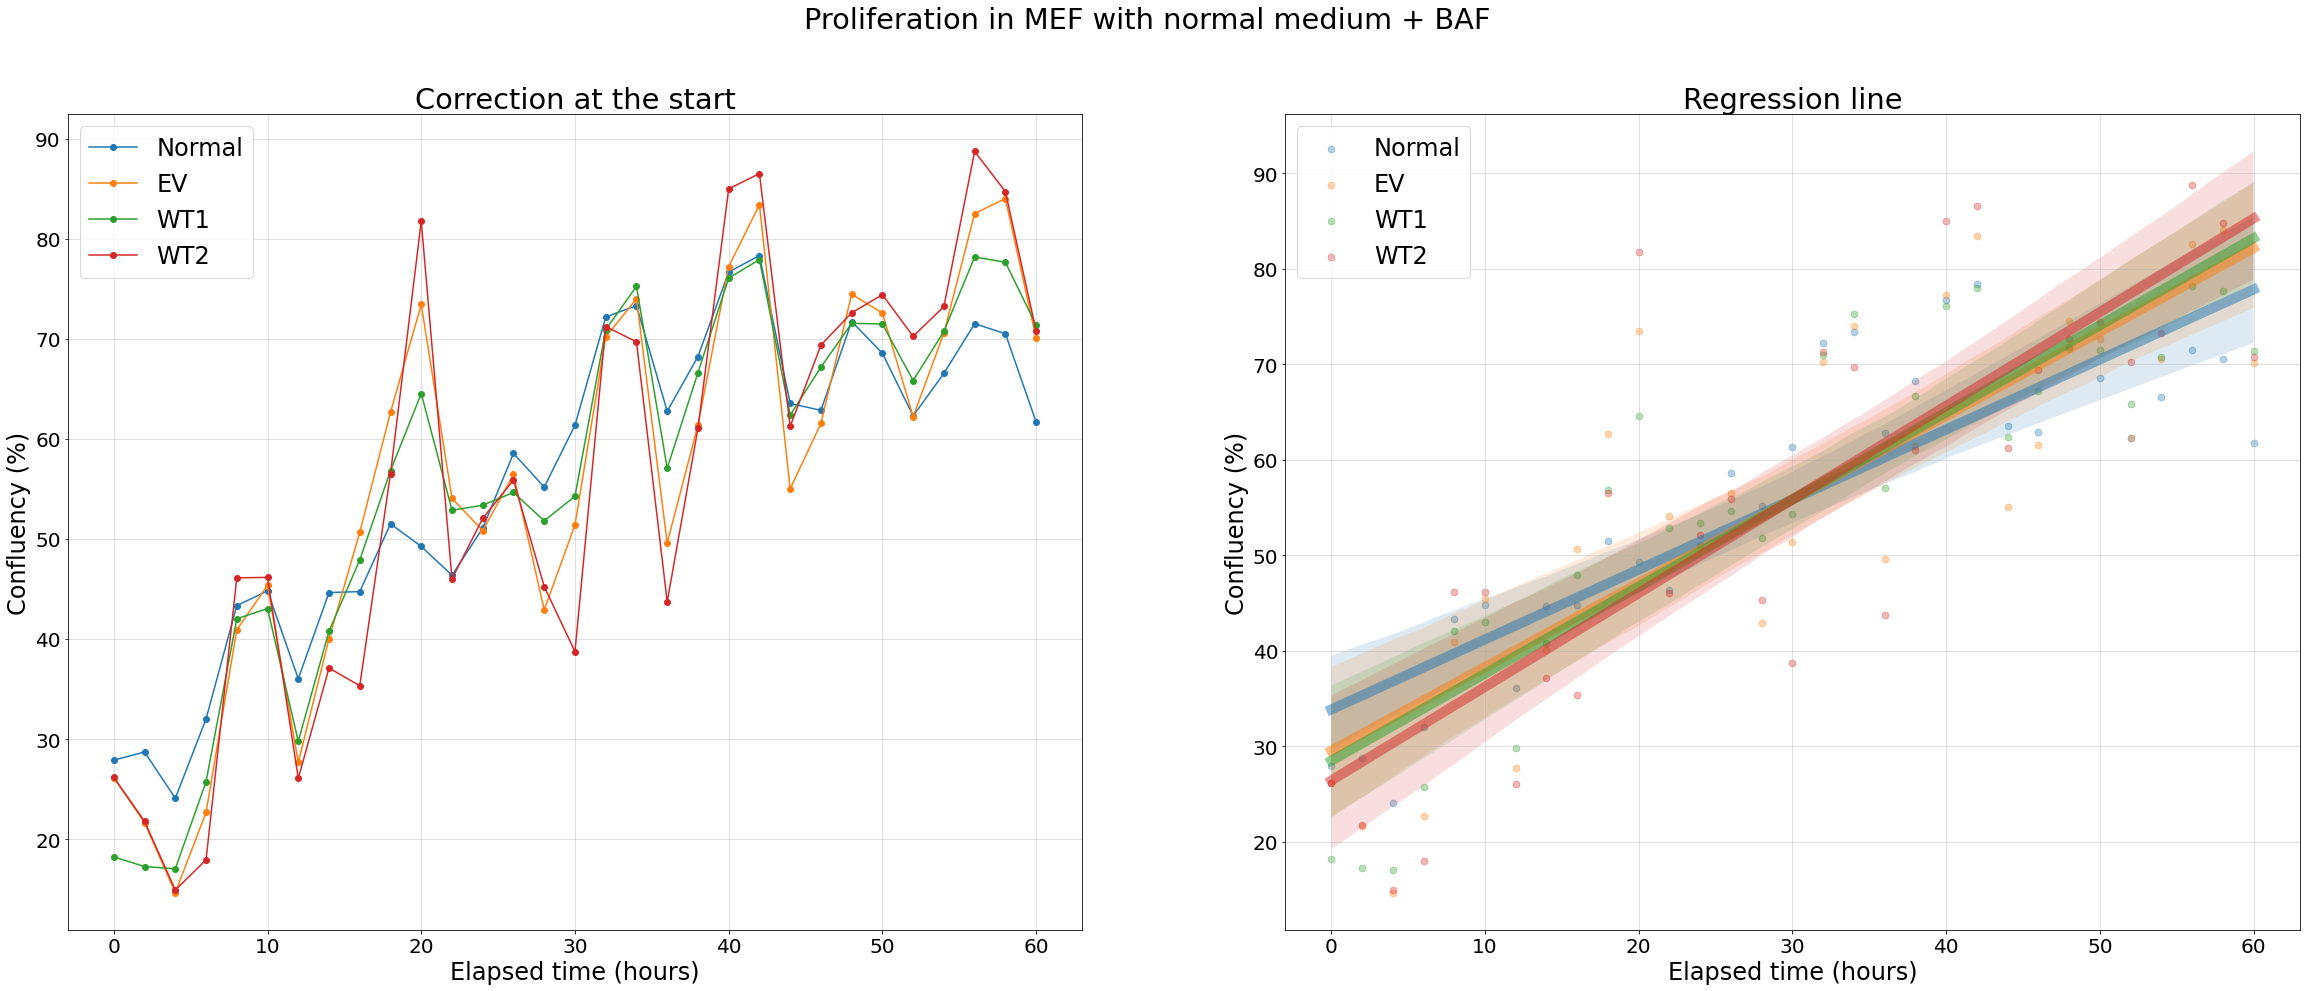

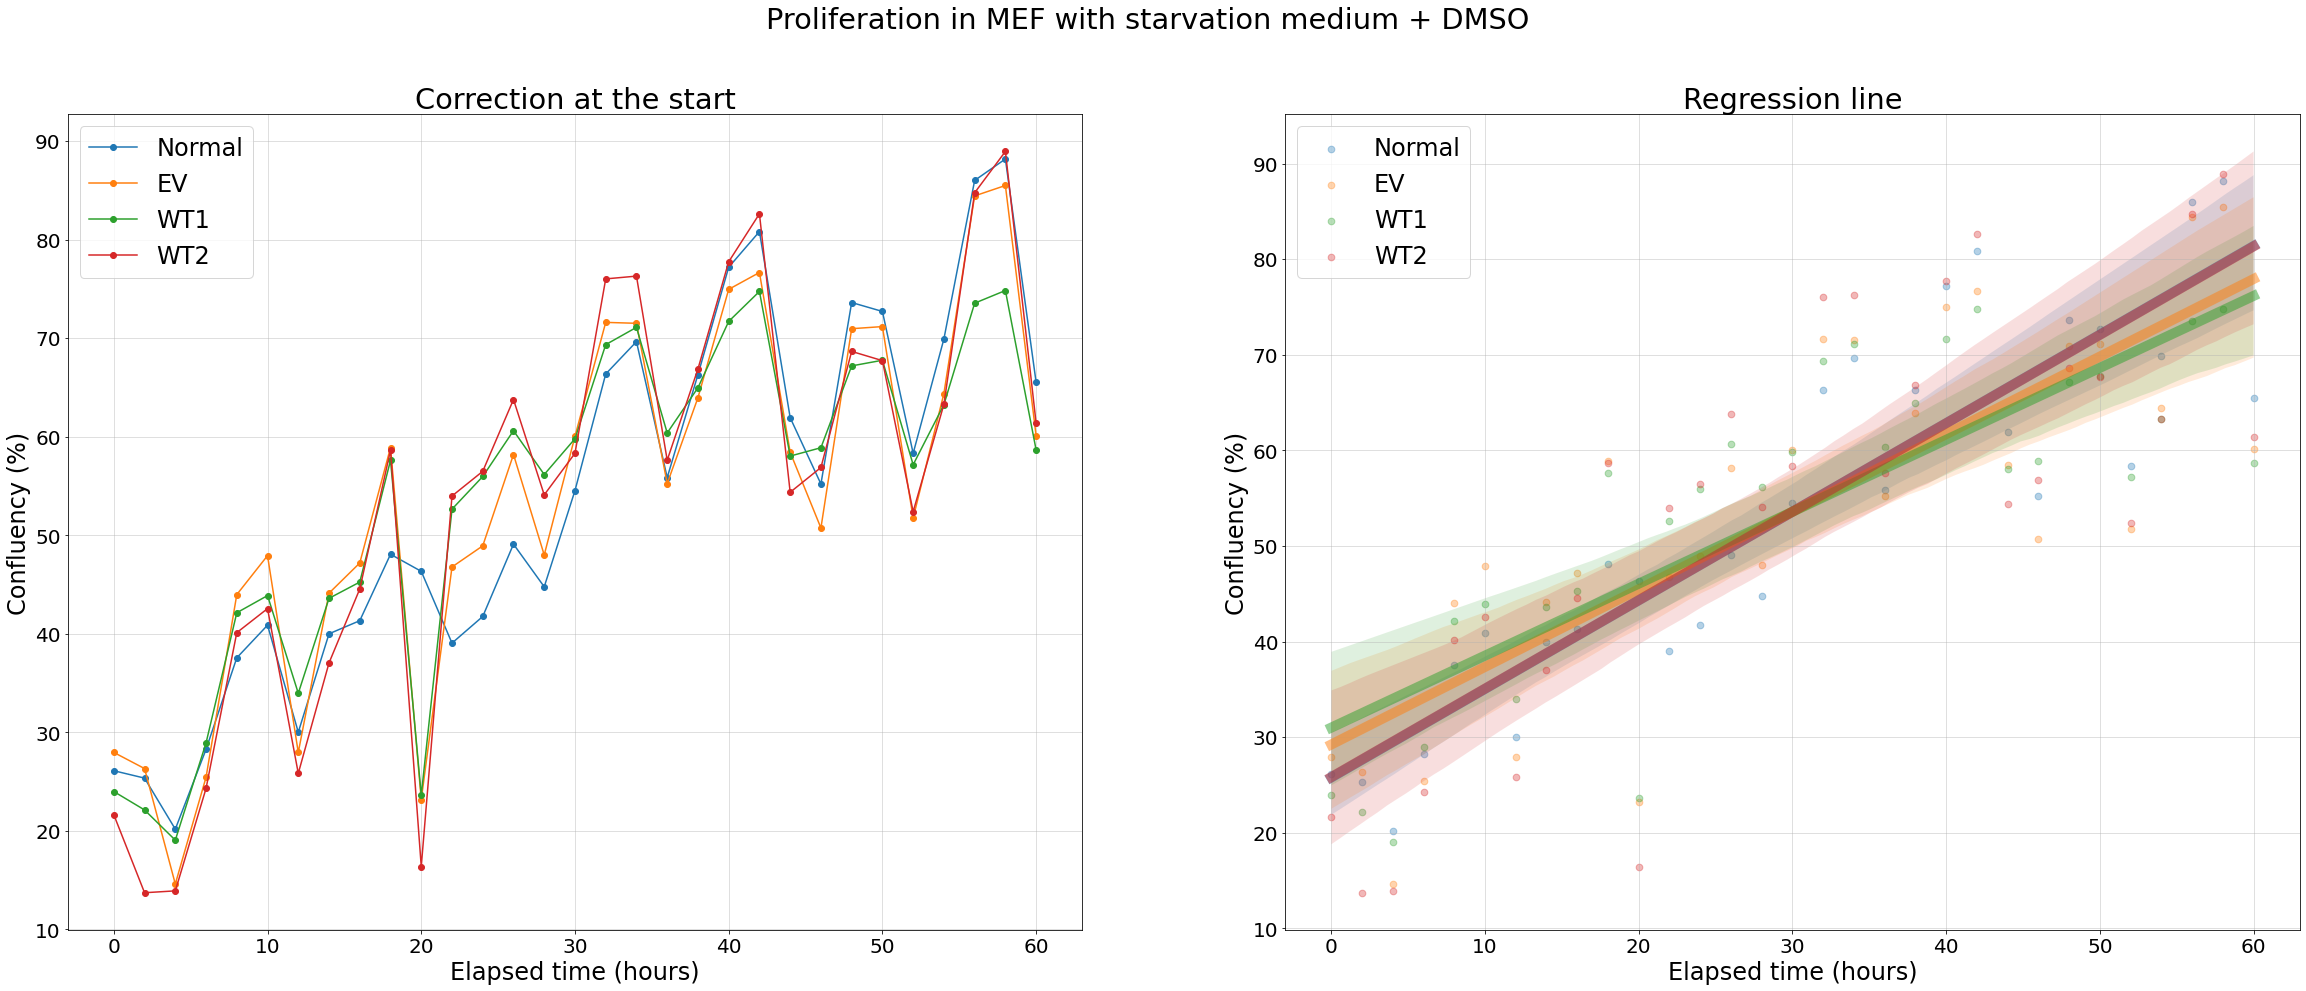

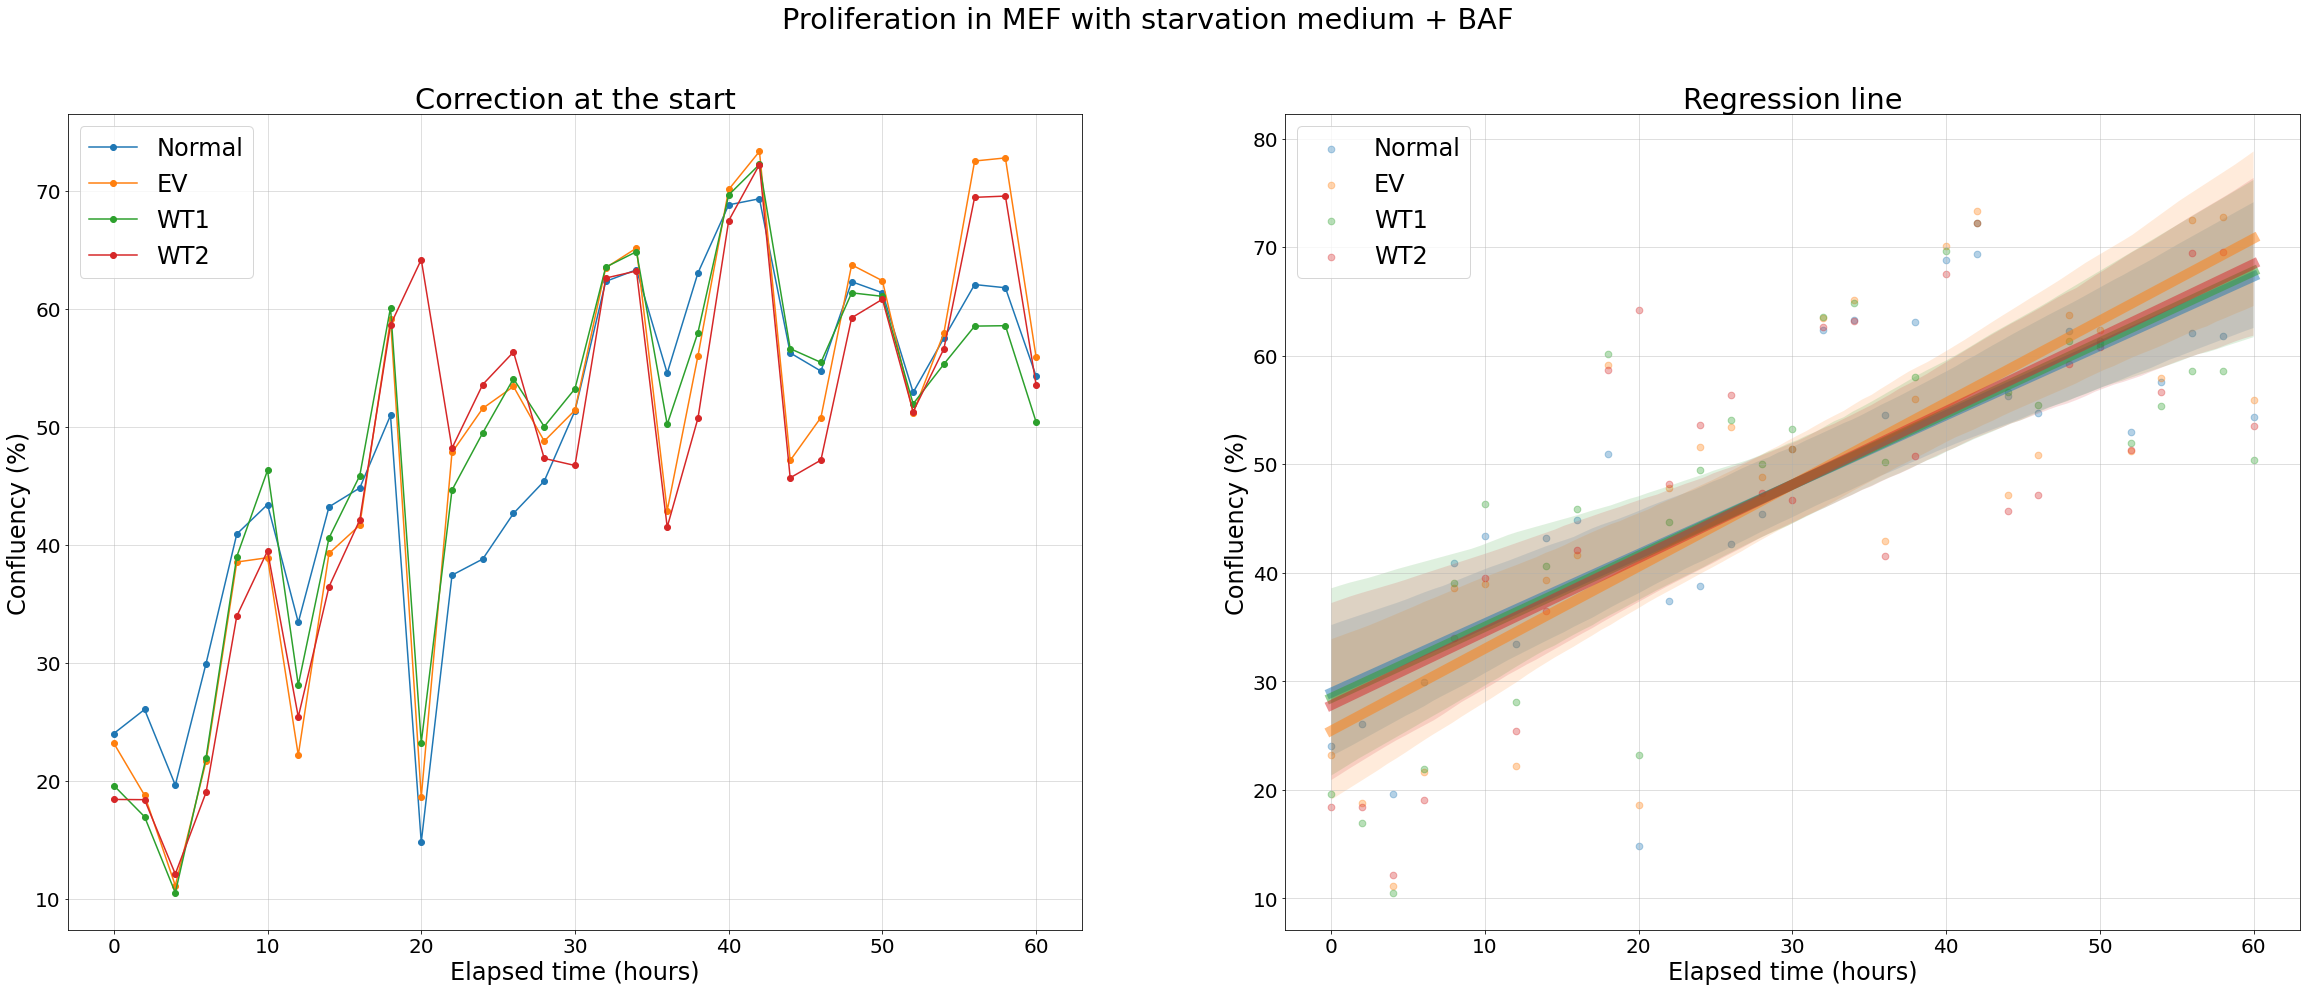

In [7]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['dmso', 'baf', 'dmso', 'baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]:     
        label_ = column.split(' ')[0]
        
#         #graph 1, data visualization
#         x=prolif_df['Elapsed']
#         y=prolif_df[column]
#         ax[0].plot(x, y, 'o-', label= label_)
#         ax[0].grid(alpha = 0.5)
#         ax[0].legend()
#         ax[0].set_title("Data visualization")
#         ax[0].set_ylabel('Confluency (%)')
#         ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

In [27]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    drug = drugs[i]
    
    ##Correction
    shift = prolif_df[col_selection].mean()   #list of means for all columns
    general_mean = prolif_df[col_selection].mean().mean() #mean of means
    relative_mu = shift/general_mean #correction to apply for each column
    corrected_data = prolif_df[col_selection]/relative_mu #corrected data
    

In [ ]:
df.rename(columns={df.columns[1]: 'Fee', df.columns[2]: 'Duration'},inplace=True)
print(df.columns)

In [32]:
corrected_data

,Normal + Starvation + BAF,EV + Starvation + BAF,WT1 + Starvation + BAF,dVSR(1) + Starvation + BAF,WT2 + Starvation + BAF,dVSR(2) + Starvation + BAF
0,24.014548,23.190547,19.606033,24.954269,18.426491,26.847190
1,26.050116,18.782863,16.959712,23.101223,18.404948,16.501057
2,19.645448,11.124259,10.516939,14.626067,12.106017,14.683058
3,29.945194,21.650284,21.956273,24.556521,19.021232,24.668646
4,40.923399,38.550068,39.014681,40.789697,33.968604,40.275039
5,43.427334,38.917891,46.322729,46.118289,39.487145,46.223380
6,33.432875,22.175111,28.126997,31.048485,25.424142,30.545804
7,43.228288,39.285695,40.591596,46.766905,36.458374,40.540539
8,44.831267,41.674249,45.873021,48.937002,42.117964,48.567231
9,50.985005,59.131554,60.117452,61.504408,58.656410,57.539010


In [29]:
prolif_rich_DMSO

Index(['Normal + DMEM + DMSO', 'EV + DMEM + DMSO', 'WT1 + DMEM + DMSO',
       'dVSR(1) + DMEM + DMSO', 'WT2 + DMEM + DMSO', 'dVSR(2) + DMEM + DMSO'],
      dtype='object')

In [30]:
corrected_data[Normal], corrected_data[EV]
corrected_data[WT1], corrected_data[EV]
corrected_data[WT2], corrected_data[EV]
corrected_data[WT1], corrected_data[WT2]


NameError: name 'Normal' is not defined

In [39]:
corrected_data.columns

Index(['Normal + Starvation + BAF', 'EV + Starvation + BAF',
       'WT1 + Starvation + BAF', 'dVSR(1) + Starvation + BAF',
       'WT2 + Starvation + BAF', 'dVSR(2) + Starvation + BAF'],
      dtype='object')

In [40]:
statistic, pvalue = scipy.stats.mannwhitneyu(corrected_data['Normal + Starvation + BAF'], 
                                             corrected_data['EV + Starvation + BAF'])
Pvalue = "{:.3E}".format(pvalue)
Pvalue

'4.385E-01'

In [15]:
test = corrected_data.copy()

In [36]:
corrected_data

,Normal + Starvation + BAF,EV + Starvation + BAF,WT1 + Starvation + BAF,dVSR(1) + Starvation + BAF,WT2 + Starvation + BAF,dVSR(2) + Starvation + BAF
0,24.014548,23.190547,19.606033,24.954269,18.426491,26.847190
1,26.050116,18.782863,16.959712,23.101223,18.404948,16.501057
2,19.645448,11.124259,10.516939,14.626067,12.106017,14.683058
3,29.945194,21.650284,21.956273,24.556521,19.021232,24.668646
4,40.923399,38.550068,39.014681,40.789697,33.968604,40.275039
5,43.427334,38.917891,46.322729,46.118289,39.487145,46.223380
6,33.432875,22.175111,28.126997,31.048485,25.424142,30.545804
7,43.228288,39.285695,40.591596,46.766905,36.458374,40.540539
8,44.831267,41.674249,45.873021,48.937002,42.117964,48.567231
9,50.985005,59.131554,60.117452,61.504408,58.656410,57.539010


In [ ]:
test[]

In [ ]:
df.rename(columns={df.columns[1]: 'Fee', df.columns[2]: 'Duration'},inplace=True)

In [28]:
corrected_data.head()

,Normal + Starvation + BAF,EV + Starvation + BAF,WT1 + Starvation + BAF,dVSR(1) + Starvation + BAF,WT2 + Starvation + BAF,dVSR(2) + Starvation + BAF
0,24.014548,23.190547,19.606033,24.954269,18.426491,26.847190
1,26.050116,18.782863,16.959712,23.101223,18.404948,16.501057
2,19.645448,11.124259,10.516939,14.626067,12.106017,14.683058
3,29.945194,21.650284,21.956273,24.556521,19.021232,24.668646
4,40.923399,38.550068,39.014681,40.789697,33.968604,40.275039


In [14]:
# stats
corrected_data.head()
statistic, pvalue = scipy.stats.mannwhitneyu(corrected_data[], df[2][isoform])
Pvalue = "{:.3E}".format(pvalue)
print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
print()

,Normal + Starvation + BAF,EV + Starvation + BAF,WT1 + Starvation + BAF,dVSR(1) + Starvation + BAF,WT2 + Starvation + BAF,dVSR(2) + Starvation + BAF
0,24.014548,23.190547,19.606033,24.954269,18.426491,26.847190
1,26.050116,18.782863,16.959712,23.101223,18.404948,16.501057
2,19.645448,11.124259,10.516939,14.626067,12.106017,14.683058
3,29.945194,21.650284,21.956273,24.556521,19.021232,24.668646
4,40.923399,38.550068,39.014681,40.789697,33.968604,40.275039
